# Q3

### Import library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os

### Import data

In [2]:
os.system('clear')

0

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
print(df.shape)

(400, 5)


dataset has 400 rows and 5 columns

### Columns in the data including target

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
x_col = ['Age', 'EstimatedSalary']
target_col = ['Purchased']

### Divide the data set so that 30% of the data is as test data

In [9]:
X = df[x_col]
Y = df[target_col]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=41)

### Feature Scaling

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Fitting a logistic regression model 

In [12]:
log_reg = LogisticRegression().fit(x_train, y_train)

/Users/ttg/pyenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Making predictions on the test data

In [13]:
y_pred = log_reg.predict(x_test)

In [14]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

### Compare the actual output values for in the testing set with the predicted values

In [15]:
y_test  = y_test.reset_index(drop=True)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0: 'Predict_Purchased'})
df_com = pd.concat([y_test, y_pred], axis=1)
df_com

,Purchased,Predict_Purchased
0,1,1
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
115,0,0
116,0,0
117,1,1
118,0,0


### Confusion matrix

In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_com['Purchased'], df_com['Predict_Purchased'])
cnf_matrix

array([[73,  4],
       [15, 28]])

### Decision boundary given by the trained model

In [20]:
import matplotlib.pyplot as plt

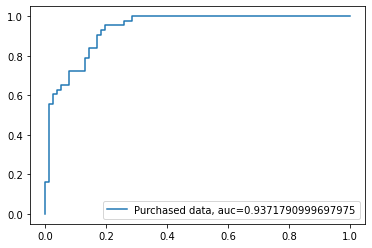

In [31]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Purchased data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
y_pred_proba

array([0.99484537, 0.96629424, 0.2851336 , 0.92479559, 0.0053196 ,
       0.55632738, 0.01163912, 0.97828   , 0.4781161 , 0.05596294,
       0.38733181, 0.4953399 , 0.99101671, 0.43171471, 0.3199658 ,
       0.97093123, 0.97843178, 0.07718114, 0.90780011, 0.27517886,
       0.42038435, 0.90043916, 0.11577131, 0.06866898, 0.01348676,
       0.40281965, 0.43903545, 0.10205619, 0.19583318, 0.61311605,
       0.01843273, 0.8889651 , 0.07858765, 0.01401029, 0.66753613,
       0.4026861 , 0.00498743, 0.86505384, 0.01190868, 0.02292871,
       0.01515503, 0.19583318, 0.10238508, 0.2601523 , 0.07451365,
       0.00334069, 0.97930454, 0.04447397, 0.088836  , 0.20314357,
       0.01368632, 0.36475148, 0.76230914, 0.03799897, 0.3215274 ,
       0.02681389, 0.09326325, 0.89587349, 0.22909744, 0.21453366,
       0.93661505, 0.32412051, 0.40727163, 0.15104799, 0.04787379,
       0.67186826, 0.34206916, 0.0103906 , 0.00737896, 0.90011741,
       0.21332832, 0.86990443, 0.22296941, 0.00179246, 0.03582